# Journey Data Attrition Analysis
### Ting Sun -- Oct, 2019

In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [2]:
import gc
gc.collect()

7

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier


In [5]:
import pandas_profiling as pandprof

In [6]:
import matplotlib.pyplot as plt
#import scikitplot as skplt
from sklearn import metrics

In [7]:
from imblearn.over_sampling import SMOTE

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
import csv
import itertools

In [9]:
from tensorflow.python.keras.layers import Input, Dense, Dropout,LSTM
from tensorflow.python.keras.models import Model, load_model


In [10]:

from tensorflow.python.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.python.keras import regularizers, Sequential

In [11]:
univ=pd.read_csv('..\jrn_universe_201909wk1_embed.csv', skiprows=1,encoding='utf-8',sep=",",quoting=csv.QUOTE_NONE,engine='python',
                names= ['idx','ocif_id','class','v1',	'v2',	'v3',	'v4',	'v5',	'v6',	'v7',	'v8',	'v9',	'v10',	'v11',	'v12',	'v13',	'v14',	'v15',	'v16',	'v17',	'v18',	'v19',	'v20',	'v21',	'v22',	'v23',	'v24',	'v25',	'v26',	'v27',	'v28',	'v29',	'v30',	'v31',	'v32',	'v33',	'v34',	'v35',	'v36',	'v37',	'v38',	'v39',	'v40',	'v41',	'v42',	'v43',	'v44',	'v45',	'v46',	'v47',	'v48',	'v49',	'v50',
])

In [12]:
univ.head()

,idx,ocif_id,class,v1,v2,v3,v4,v5,v6,v7,...,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50
0,0,001069464216288,0,-1.433111,5.209958,-5.731508,0.873382,-1.761791,-0.173951,4.373620,...,5.822658,-1.575693,-0.734080,-0.788835,-0.537356,-4.471012,-5.095016,-6.633667,2.481604,-6.480044
1,1,001069464307179,0,-3.739344,7.331641,-4.983212,-1.271056,-2.616382,-0.294269,3.283833,...,0.312733,-2.865328,-2.334048,-0.861015,-4.896544,-1.938946,4.658707,-6.747419,1.286169,-4.215518
2,2,001069464309050,0,-2.707020,-3.267683,-0.910116,-0.940657,-7.300041,0.589323,-0.006612,...,-6.223355,-10.784649,-1.112462,-1.100864,-5.309468,-1.130732,-2.145075,0.037013,1.472310,-4.965487
3,3,001069466113872,0,-1.426828,1.852410,-1.614281,-0.114438,-2.819932,-1.379477,0.344765,...,0.076467,0.022537,-0.445504,-1.891142,-1.251115,-0.819161,0.934334,-1.805593,-0.036279,-1.130304
4,4,001069467716456,0,-3.074671,5.708027,-3.455483,-1.740084,-1.422159,-2.152689,4.925292,...,-4.247244,-5.694802,-1.734305,-0.610952,-2.392882,-1.109465,4.785700,-5.106378,-0.321304,-3.152390


In [13]:
#remove quote and change type to float:

#univ['v1']=univ.v1.str.replace('"', '').astype('float64')


In [14]:
#univ['v50']=univ.v50.str.replace('"', '').astype('float64')

In [15]:
#univ['ocif_id']=univ['ocif_id'].astype('str')

In [16]:
univ.dtypes

idx          int64
ocif_id     object
class        int64
v1         float64
v2         float64
v3         float64
v4         float64
v5         float64
v6         float64
v7         float64
v8         float64
v9         float64
v10        float64
v11        float64
v12        float64
v13        float64
v14        float64
v15        float64
v16        float64
v17        float64
v18        float64
v19        float64
v20        float64
v21        float64
v22        float64
v23        float64
v24        float64
v25        float64
v26        float64
v27        float64
v28        float64
v29        float64
v30        float64
v31        float64
v32        float64
v33        float64
v34        float64
v35        float64
v36        float64
v37        float64
v38        float64
v39        float64
v40        float64
v41        float64
v42        float64
v43        float64
v44        float64
v45        float64
v46        float64
v47        float64
v48        float64
v49        float64
v50        f

## Data Exploration

In [15]:
# check data to see whether it needs to be scaled (change the range of data) or normalized (change the distribution of data). 
#train test split


In [190]:
univ.isnull().sum().max()

0

In [191]:
# The classes are heavily skewed we need to solve this issue later.
print('Not Attrited', round(univ['class'].value_counts()[0]/len(univ) * 100,2), '% of the dataset')
print('Attrited', round(univ['class'].value_counts()[1]/len(univ) * 100,2), '% of the dataset')

Not Attrited 99.31 % of the dataset
Attrited 0.69 % of the dataset


Text(0.5,1,'Class Distributions \n (0: Not Attrited || 1: Attrited)')

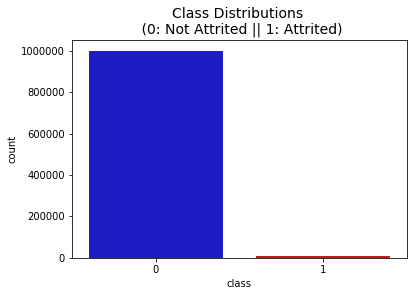

In [192]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('class', data=univ, palette=colors)
plt.title('Class Distributions \n (0: Not Attrited || 1: Attrited)', fontsize=14)

In [193]:
# random undersampling

In [194]:
univ = univ.sample(frac=1)

In [195]:
univ['class'].value_counts()

0    1000000
1       6950
Name: class, dtype: int64

In [196]:
# amount of fraud classes 492 rows.
attr_df = univ.loc[univ['class'] == 1]
non_attr_df = univ.loc[univ['class'] == 0][:6950]

In [197]:
normal_distributed_df = pd.concat([attr_df, non_attr_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,idx,ocif_id,class,v1,v2,v3,v4,v5,v6,v7,...,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50
698483,698483,622235256468300,1,-0.061317,1.806205,-0.985280,0.723257,-0.150136,0.493264,0.521288,...,-2.110341,-0.416235,-1.787688,0.763193,0.844660,-0.968006,-2.702138,1.254500,1.723318,-1.563630
940964,940964,911273362798200,1,2.985120,-6.230031,0.609142,-2.970578,-2.319840,-9.232622,-18.139338,...,-1.833820,-4.580018,6.683041,5.814193,9.424515,-9.408113,-4.746937,-9.840550,-0.385886,0.242633
110931,110931,121229426114900,0,-36.938955,-10.270570,1.170734,-29.250171,-38.721248,46.180543,-4.837774,...,-15.867753,-26.400995,-23.360987,55.759847,74.261524,-31.258027,20.465858,-44.840886,54.463840,7.115733
45713,45713,109188194816800,1,-0.061317,1.806205,-0.985280,0.723257,-0.150136,0.493264,0.521288,...,-2.110341,-0.416235,-1.787688,0.763193,0.844660,-0.968006,-2.702138,1.254500,1.723318,-1.563630
902881,902881,824007369981700,1,-1.088705,1.860114,-0.799609,-0.555963,0.285191,1.739980,-0.706848,...,-1.029931,-1.179335,-0.287097,-0.425259,1.193300,-0.495081,-1.850443,0.045532,0.505519,-1.539724


In [198]:
from scipy import stats


In [199]:
stats.pointbiserialr(univ['v49'],univ['class'])

PointbiserialrResult(correlation=-0.0032443295023001427, pvalue=0.0011315760343701049)

In [26]:
# Correlation Matrices

In [27]:
univ['class'].corr(univ['v33'])

-0.019511231154688845

In [28]:
univ['class'].corr(univ['v49'])

-0.0032443295023001683

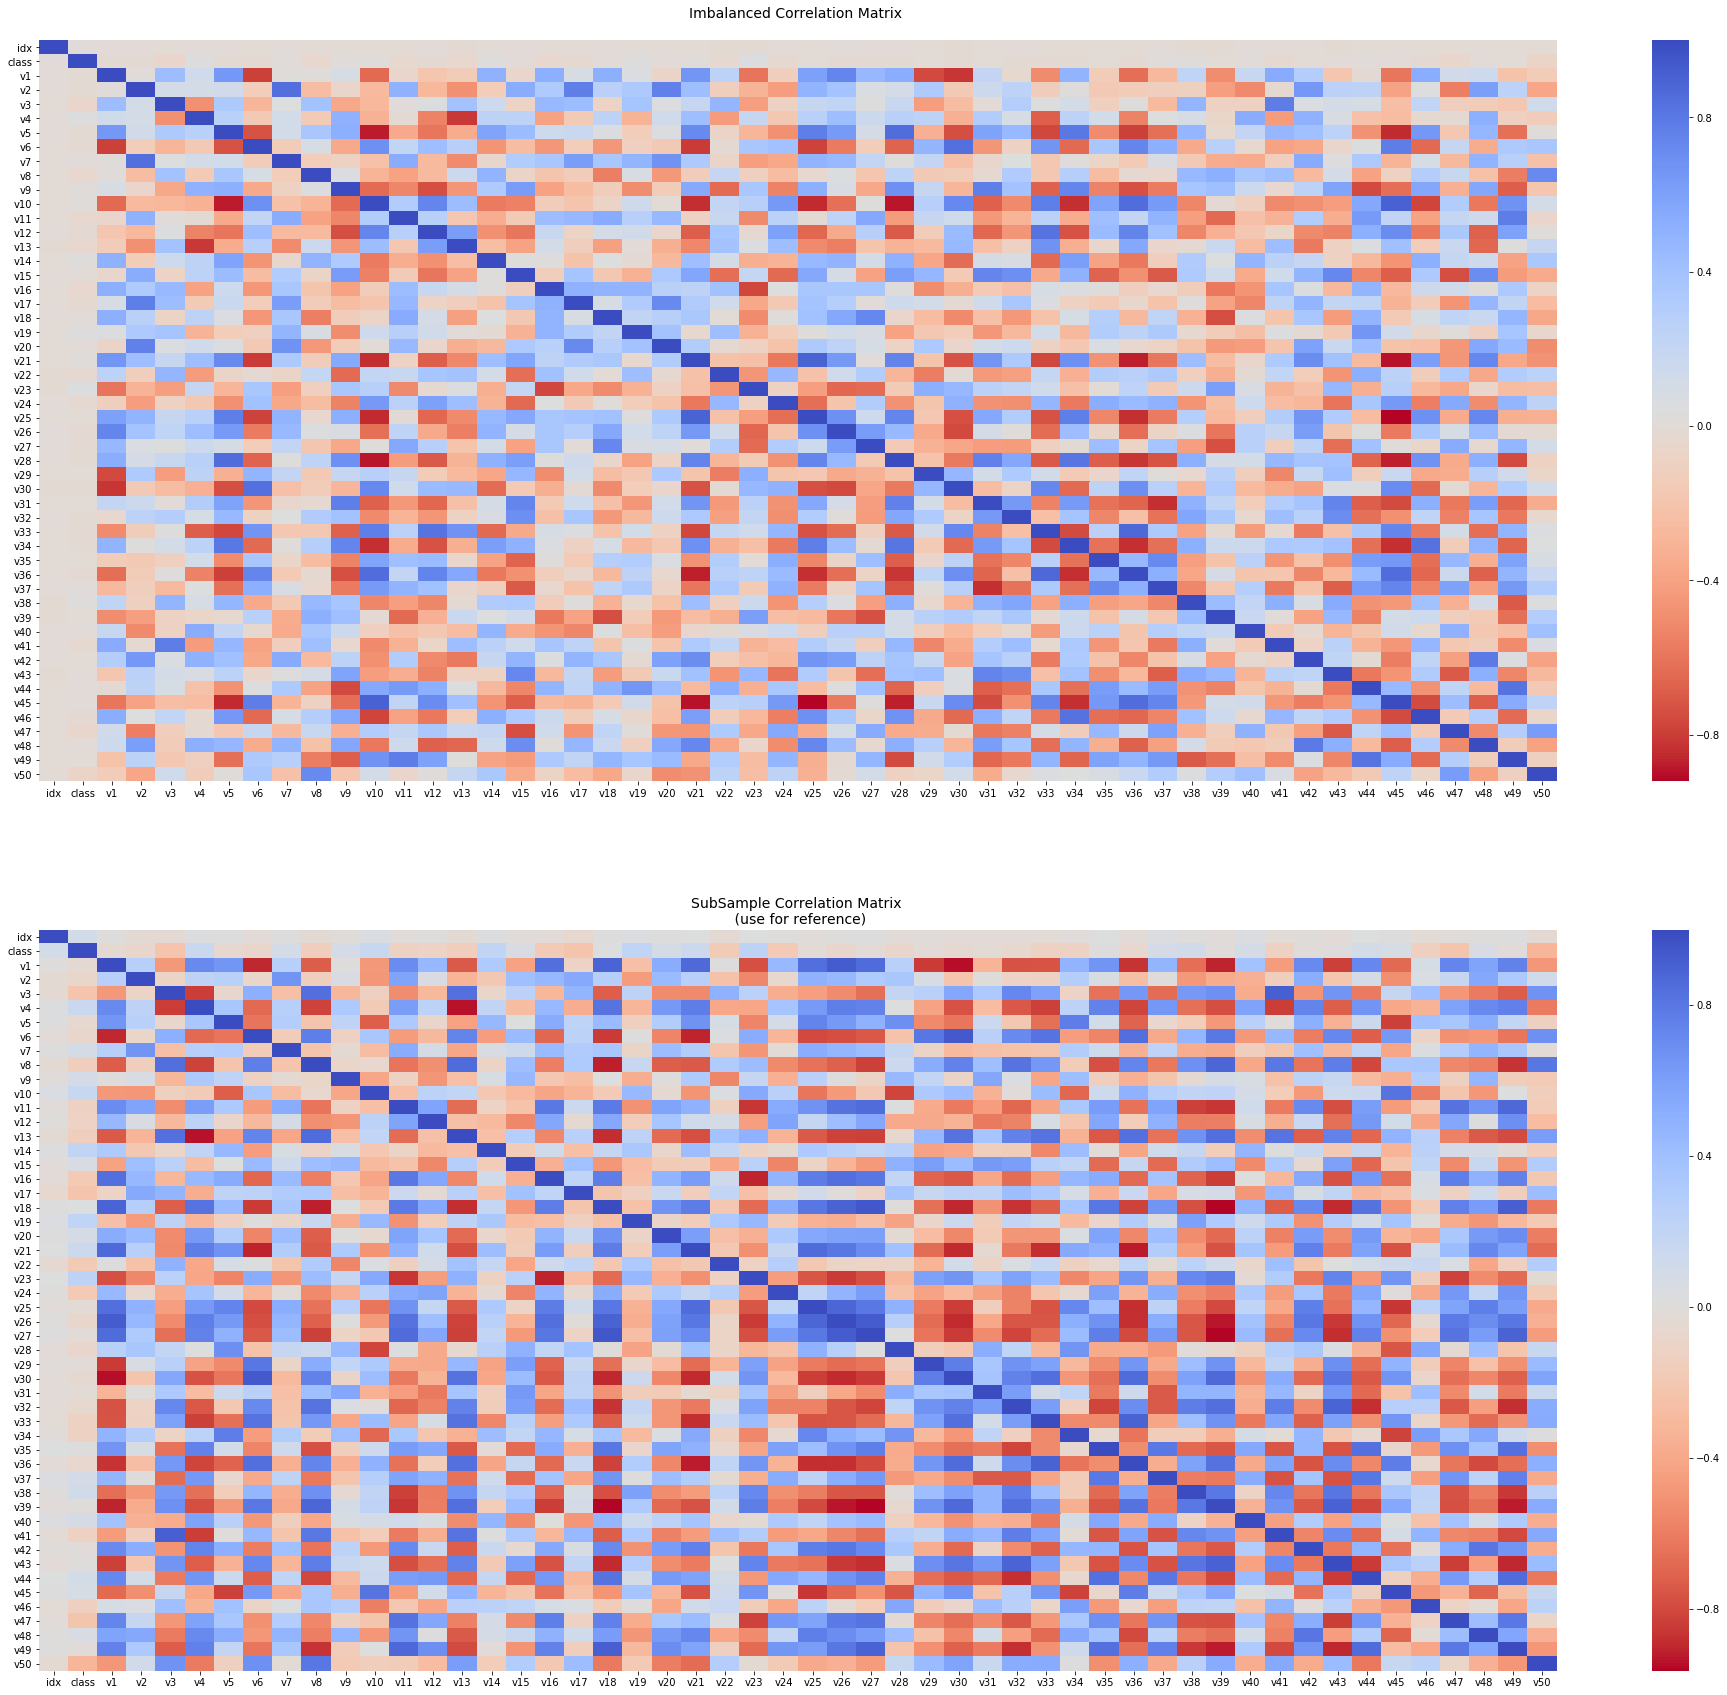

In [29]:

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(34,30))

# Entire DataFrame
corr = univ.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [200]:
new_df.shape

(13900, 53)

In [201]:
# train_test split:
#training_data, testing_data = train_test_split(new_df, test_size=0.2, random_state = 22)

In [202]:
y=new_df['class']

In [203]:
X=new_df.loc[:, (new_df.columns != 'class') & (new_df.columns != 'ocif_id') & (new_df.columns != 'idx')]

In [204]:
X.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50
698483,-0.061317,1.806205,-0.985280,0.723257,-0.150136,0.493264,0.521288,-2.480397,-0.963013,0.300467,...,-2.110341,-0.416235,-1.787688,0.763193,0.844660,-0.968006,-2.702138,1.254500,1.723318,-1.563630
940964,2.985120,-6.230031,0.609142,-2.970578,-2.319840,-9.232622,-18.139338,0.014659,-7.951917,10.889421,...,-1.833820,-4.580018,6.683041,5.814193,9.424515,-9.408113,-4.746937,-9.840550,-0.385886,0.242633
110931,-36.938955,-10.270570,1.170734,-29.250171,-38.721248,46.180543,-4.837774,-12.467940,-77.946099,60.086772,...,-15.867753,-26.400995,-23.360987,55.759847,74.261524,-31.258027,20.465858,-44.840886,54.463840,7.115733
45713,-0.061317,1.806205,-0.985280,0.723257,-0.150136,0.493264,0.521288,-2.480397,-0.963013,0.300467,...,-2.110341,-0.416235,-1.787688,0.763193,0.844660,-0.968006,-2.702138,1.254500,1.723318,-1.563630
902881,-1.088705,1.860114,-0.799609,-0.555963,0.285191,1.739980,-0.706848,-1.798470,-0.631217,-0.163728,...,-1.029931,-1.179335,-0.287097,-0.425259,1.193300,-0.495081,-1.850443,0.045532,0.505519,-1.539724


In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [206]:
#simple logistic regression

In [207]:
X_test.shape

(4170, 50)

In [208]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [209]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regresbsion classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regresbsion classifier on test set: 0.83


In [210]:
y_test.value_counts()

1    2086
0    2084
Name: class, dtype: int64

In [211]:
print(confusion_matrix(y_test, y_pred))

[[1825  259]
 [ 430 1656]]


In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      2084
           1       0.86      0.79      0.83      2086

    accuracy                           0.83      4170
   macro avg       0.84      0.83      0.83      4170
weighted avg       0.84      0.83      0.83      4170



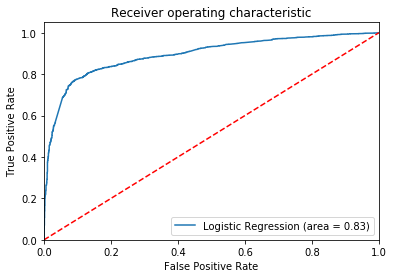

In [213]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [67]:
#plot classification report
def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black",fontsize=12,fontweight='bold')

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()

In [44]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85      2084\n           1       0.88      0.79      0.83      2086\n\n    accuracy                           0.84      4170\n   macro avg       0.84      0.84      0.84      4170\nweighted avg       0.84      0.84      0.84      4170\n'

In [52]:
len(classification_report(y_test, y_pred))

NameError: name 'y_test' is not defined

In [61]:
sampleClassificationReport = """            precision    recall  f1-score   support\n\n           0       0.81      0.89      0.85      2084\n           1       0.88      0.79      0.83      2086\n\n    """

In [62]:
len(sampleClassificationReport)

166

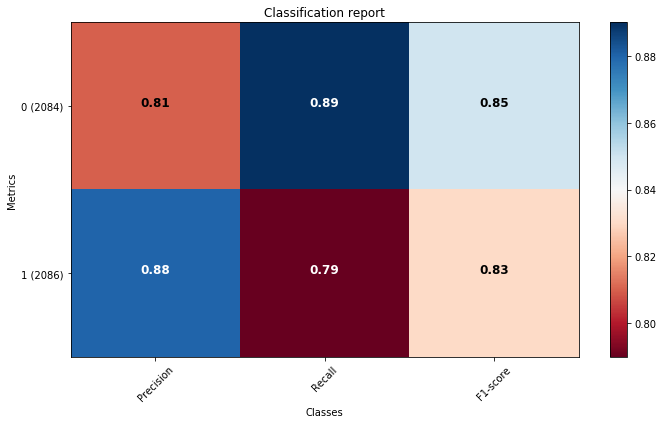

In [46]:
plt.figure(figsize=(10,6))
plot_classification_report(sampleClassificationReport)
plt.show()

## remove vars that are highly correlated from base dataframe based on profile report

In [17]:
univ.shape

(1006950, 53)

In [18]:
import gc
gc.collect()

71

In [19]:
univ1=univ.drop(['v25','v45'], axis = 1) 

In [20]:
univ1.head()

,idx,ocif_id,class,v1,v2,v3,v4,v5,v6,v7,...,v40,v41,v42,v43,v44,v46,v47,v48,v49,v50
0,0,001069464216288,0,-1.433111,5.209958,-5.731508,0.873382,-1.761791,-0.173951,4.373620,...,0.259572,5.822658,-1.575693,-0.734080,-0.788835,-4.471012,-5.095016,-6.633667,2.481604,-6.480044
1,1,001069464307179,0,-3.739344,7.331641,-4.983212,-1.271056,-2.616382,-0.294269,3.283833,...,-1.629192,0.312733,-2.865328,-2.334048,-0.861015,-1.938946,4.658707,-6.747419,1.286169,-4.215518
2,2,001069464309050,0,-2.707020,-3.267683,-0.910116,-0.940657,-7.300041,0.589323,-0.006612,...,3.712376,-6.223355,-10.784649,-1.112462,-1.100864,-1.130732,-2.145075,0.037013,1.472310,-4.965487
3,3,001069466113872,0,-1.426828,1.852410,-1.614281,-0.114438,-2.819932,-1.379477,0.344765,...,0.049793,0.076467,0.022537,-0.445504,-1.891142,-0.819161,0.934334,-1.805593,-0.036279,-1.130304
4,4,001069467716456,0,-3.074671,5.708027,-3.455483,-1.740084,-1.422159,-2.152689,4.925292,...,-2.404101,-4.247244,-5.694802,-1.734305,-0.610952,-1.109465,4.785700,-5.106378,-0.321304,-3.152390


## smote oversampling 

In [21]:
os = SMOTE(random_state=9)

In [22]:
smoteY=univ1['class']

In [23]:
smoteX=univ1.loc[:, (univ1.columns != 'class') & (univ1.columns != 'ocif_id') & (univ1.columns != 'idx')]

In [24]:
sX_train, sX_test, sy_train, sy_test = train_test_split(smoteX, smoteY, test_size=0.3, random_state=8)

In [25]:
os_data_X,os_data_y=os.fit_sample(sX_train, sy_train)


In [26]:
sX_test.shape

(302085, 48)

In [27]:
sX_train.shape

(704865, 48)

In [28]:
columns = sX_train.columns

In [29]:
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

In [30]:
os_data_y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [31]:
os_data_y['y'].value_counts()

1    700011
0    700011
Name: y, dtype: int64

In [32]:
## we now have balanced training dataset. we can do Recursive Feature Elimination (RFE)


In [33]:
#from sklearn.feature_selection import RFE

In [34]:
#logreg = LogisticRegression()

In [35]:
#rfe = RFE(logreg, 30)

In [36]:
#rfe1 = rfe.fit(os_data_X,os_data_y)

In [37]:
#print(rfe1.ranking_)

In [38]:
#rfe.support_

In [39]:
#fncol=os_data_X.columns[rfe.support_]

In [70]:
#find the most significant 30 columns. and drop the other 14. 

#os_data_X1 = pd.DataFrame(data=os_data_X,columns=fncol )

In [71]:
#os_data_X1.shape

In [72]:
# p values are all significant. we are good to go. 

# Implement simple classifiers

In [40]:
import pickle

In [25]:


classifiers = {
    "LogisiticRegression": LogisticRegression(random_state=10),
     "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=10),
    #"GradientBoostingClassifier":GradientBoostingClassifier(random_state=3457),
    #"Support Vector Classifier": SVC(random_state=10),
    "XGBoostClassifier": XGBClassifier(random_state=3457)
}

In [ ]:
#svm
svmreg=SVC(random_state=10).fit(os_data_X, os_data_y)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
print("SVM as a testing score of " ,svmreg.score(sX_test, sy_test))

In [ ]:
filename = 'svmModel.sav'
pickle.dump(svmreg, open(filename, 'wb'))

In [172]:
logreg=LogisticRegression(random_state=10).fit(os_data_X, os_data_y)


C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [173]:
print("LogisticRegression as a testing score of " ,logreg.score(sX_test, sy_test))

LogisticRegression as a testing score of  0.889550954201632


In [37]:
logregpred=logreg.predict(sX_test)

In [174]:
filename = 'logregModel.sav'
pickle.dump(logreg, open(filename, 'wb'))

In [175]:
logregpred=pickle.load(open('logregModel.sav', 'rb')).predict(sX_test)

In [40]:
dtreereg=DecisionTreeClassifier(random_state=10).fit(os_data_X, os_data_y)


In [41]:
print("DecisionTreeClassifier as a testing score of " ,dtreereg.score(sX_test, sy_test))

DecisionTreeClassifier as a testing score of  0.9501266199910621


In [42]:
dtreepred=dtreereg.predict(sX_test)

In [43]:
filename = 'dtreeModel.sav'
pickle.dump(dtreereg, open(filename, 'wb'))

In [44]:
xbgreg=XGBClassifier(random_state=3457).fit(os_data_X, os_data_y)

C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print("XGBClassifier as a testing score of " ,xbgreg.score(sX_test, sy_test))


XGBClassifier as a testing score of  0.9050101792541835


In [46]:

xgbpred=xbgreg.predict(sX_test)

In [47]:
filename = 'XGBModel.sav'
pickle.dump(xbgreg, open(filename, 'wb'))

In [48]:
gradbreg=GradientBoostingClassifier(random_state=10).fit(os_data_X, os_data_y)


C:\Users\tsun04\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [49]:
print("GradientBoostingClassifier testing score of " ,gradbreg.score(sX_test, sy_test))

GradientBoostingClassifier testing score of  0.9068242382110995


In [50]:
gradbpred=gradbreg.predict(sX_test)

In [51]:
filename = 'gradientbModel.sav'
pickle.dump(gradbreg, open(filename, 'wb'))

In [122]:
#alg_lst=[] 

In [118]:
classification_report(sy_test, logregpred)

'              precision    recall  f1-score   support\n\n           0       1.00      0.89      0.94    299989\n           1       0.05      0.80      0.09      2096\n\n    accuracy                           0.89    302085\n   macro avg       0.52      0.85      0.52    302085\nweighted avg       0.99      0.89      0.94    302085\n'

In [29]:
def plot_classification_report_ax(classificationReport,pos,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    
    pos.set_xticks(np.arange(3))
    pos.set_yticks(np.arange(len(classes)))
    pos.set_xticklabels(['Precision', 'Recall', 'F1-score'])
    pos.set_yticklabels(['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)])

    
    pos.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    pos.set_title(title,fontsize=20,fontweight='bold')
    #pos.colorbar()
    

    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        pos.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black",fontsize=25,fontweight='bold')

    pos.set_ylabel('Metrics')
    pos.set_xlabel('Classes')

In [30]:
logregpred=pickle.load(open('logregModel.sav', 'rb')).predict(sX_test)
dtreepred=pickle.load(open('dtreeModel.sav', 'rb')).predict(sX_test)
xgbpred=pickle.load(open('XGBModel.sav', 'rb')).predict(sX_test)
gradbpred=pickle.load(open('gradientbModel.sav', 'rb')).predict(sX_test)

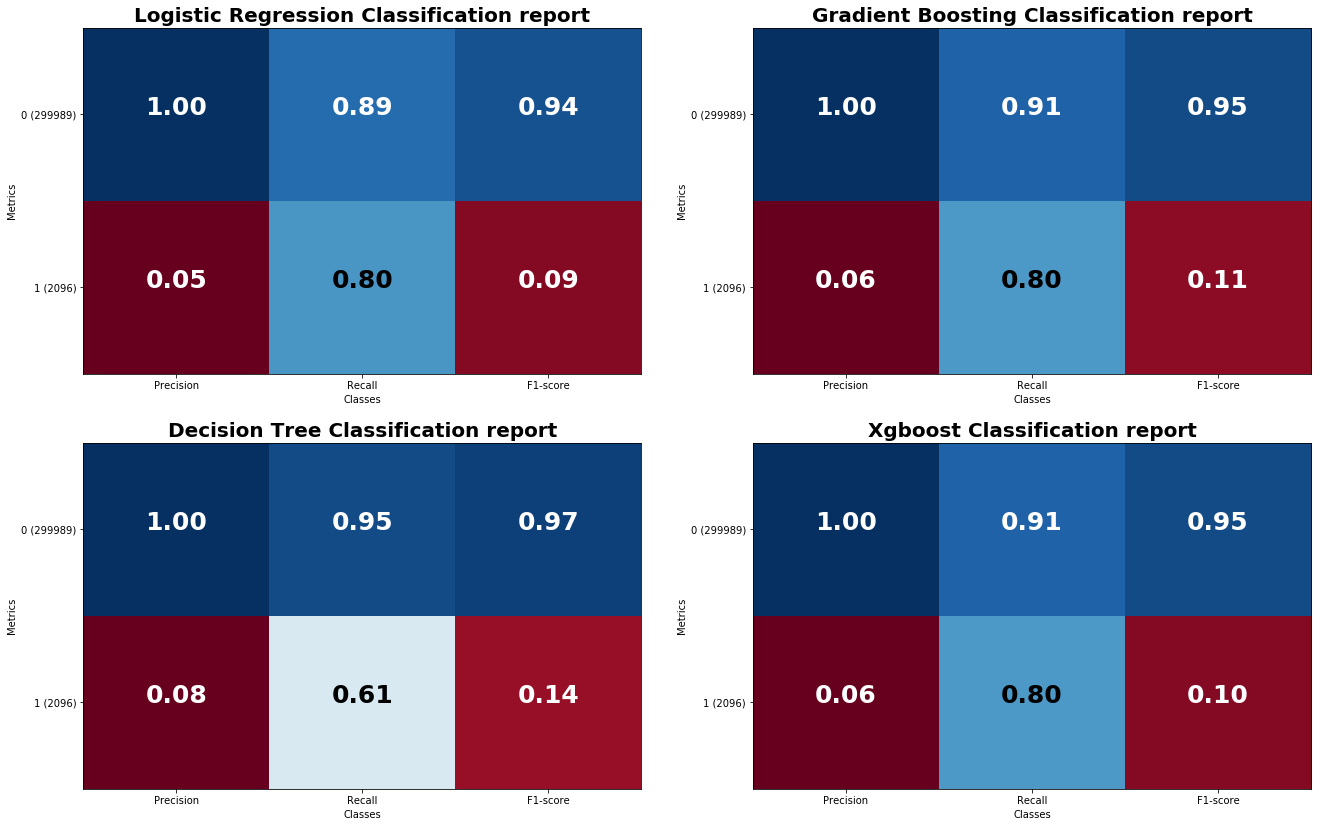

In [34]:
fig, ax = plt.subplots(2, 2,figsize=(22,14))

plot_classification_report_ax(classification_report(sy_test, logregpred)[:166],title='Logistic Regression Classification report',pos=ax[0][0])
plot_classification_report_ax(classification_report(sy_test, gradbpred)[:166],title='Gradient Boosting Classification report',pos=ax[0][1])
plot_classification_report_ax(classification_report(sy_test, dtreepred)[:166],title='Decision Tree Classification report',pos=ax[1][0])
plot_classification_report_ax(classification_report(sy_test, xgbpred)[:166],title='Xgboost Classification report',pos=ax[1][1])
plt.savefig('classification_report.png')
plt.show()

In [70]:
confusion_matrix(sy_test, logregpred)

array([[267040,  32949],
       [   416,   1680]], dtype=int64)

In [65]:
'''
for key, classifier in classifiers.items():
    clafit=classifier.fit(os_data_X, os_data_y)
    alg_lst.append(clafit)
    testing_score = clafit.score( sX_test, sy_test)
    
    print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of {:.2f}".format(testing_score))
 '''   

'\nfor key, classifier in classifiers.items():\n    clafit=classifier.fit(os_data_X, os_data_y)\n    alg_lst.append(clafit)\n    testing_score = clafit.score( sX_test, sy_test)\n    \n    print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of {:.2f}".format(testing_score))\n '

In [ ]:
#predictions:
'''
logregpred=alg_lst[0].predict(sX_test)
knpred=alg_lst[1].predict(sX_test)
dtreepred=alg_lst[2].predict(sX_test)
xgbpred=alg_lst[3].predict(sX_test)
'''

In [49]:
logregpred=pickle.load(open('logregModel.sav', 'rb')).predict_proba(sX_test)[:,1]



In [50]:
logregpred

array([0.67567754, 0.07482852, 0.31867509, ..., 0.06799816, 0.17166702,
       0.17659678])

In [51]:
dtreepred=pickle.load(open('dtreeModel.sav', 'rb')).predict_proba(sX_test)[:,1]
xgbpred=pickle.load(open('XGBModel.sav', 'rb')).predict_proba(sX_test)[:,1]
gradbpred=pickle.load(open('gradientbModel.sav', 'rb')).predict_proba(sX_test)[:,1]

In [52]:
log_fpr, log_tpr, log_thresold = roc_curve(sy_test, logregpred)

In [53]:
log_fpr, log_tpr, log_thresold = roc_curve(sy_test, logregpred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(sy_test, dtreepred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(sy_test, xgbpred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(sy_test, gradbpred)


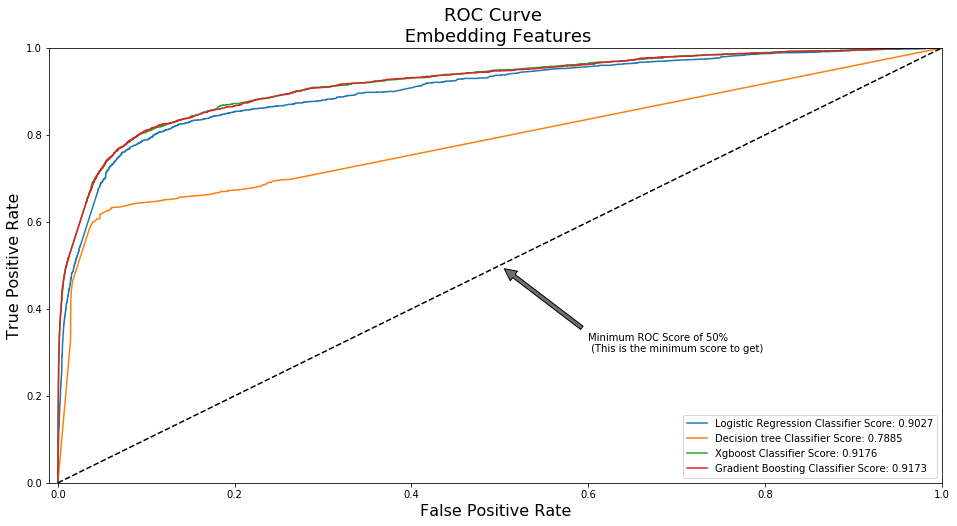

In [54]:


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Embedding Features', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(sy_test, logregpred)))
    plt.plot(knear_fpr, knear_tpr, label='Decision tree Classifier Score: {:.4f}'.format(roc_auc_score(sy_test, dtreepred)))
    plt.plot(svc_fpr, svc_tpr, label='Xgboost Classifier Score: {:.4f}'.format(roc_auc_score(sy_test, xgbpred)))
    plt.plot(tree_fpr, tree_tpr, label='Gradient Boosting Classifier Score: {:.4f}'.format(roc_auc_score(sy_test, gradbpred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.savefig('roc2.png')
plt.show()

## check for overfitting

In [56]:
logregpred=pickle.load(open('logregModel.sav', 'rb'))
dtreepred=pickle.load(open('dtreeModel.sav', 'rb'))
xgbpred=pickle.load(open('XGBModel.sav', 'rb'))
gradbpred=pickle.load(open('gradientbModel.sav', 'rb'))

In [58]:
logregpred.score( sX_train,sy_train)

0.8888581501422258

In [60]:
logregpred.score( sX_test,sy_test)

0.889550954201632

## Auto Encoder Model

The point of using autoencoders is to use the input data as its own label, and come up with some useful intermediate representation (encoding). Then when running a prediction, and feeding in input data that does not fit well to the intermediate representation, then output signal that it does not fit well. This is known as **Reconstruction Error**.

For this reason we drop the attrited customer data from the training, in order to come up with an encoding for "normal" (non-fraudulant) transactions. After the model is trained, the hope is that feeding in attrited data will easily be flagged.

In [130]:
import gc
gc.collect()

27419

In [19]:
univ2=univ1.drop(['idx','ocif_id'],axis = 1)

In [20]:
univ2.shape

(1006950, 49)

In [21]:
# split the data 70/30, training to testing
train_x, test_x = train_test_split(univ2, test_size=0.25, random_state=10)


In [22]:
train_x.shape

(755212, 49)

In [23]:
test_x.shape

(251738, 49)

In [24]:
train_x.columns

Index(['class', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31',
       'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41',
       'v42', 'v43', 'v44', 'v46', 'v47', 'v48', 'v49', 'v50'],
      dtype='object')

In [25]:
#data scaling:


In [26]:

# take out the attrited transactions from training data
attri_df = train_x[train_x['class'] == 1]
# keep only normala transaction data in training set
train_x = train_x[train_x['class'] == 0]

train_y=train_x['class']
# drop the class column (labels) from training set
train_x = train_x.drop(['class'], axis=1)

# create labels for test data
test_y = test_x['class']
# drop the labels from test data itself
test_x = test_x.drop(['class'], axis=1)


In [27]:
train_x.shape

(750019, 48)

In [28]:
test_x.shape

(251738, 48)

In [29]:

# transform to ndarray
train_x = train_x.values
test_x = test_x.values

In [30]:
# take out labels from remaining fraud data (taken out from training set)
attri_y = attri_df['class']
attri_x = attri_df.drop(['class'], axis=1).values

# extend test data and label with additional attri. data
test_x_extended = np.concatenate((attri_x, test_x), axis=0)
test_y_extended = pd.concat([attri_y, test_y])

In [70]:
# model train
nb_epoch = 40
batch_size = 256
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 25
hidden_dim = int(encoding_dim / 2) #i.e. 7
learning_rate = 1e-7

In [45]:
attri_df.head()

,class,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v40,v41,v42,v43,v44,v46,v47,v48,v49,v50
389957,1,-14.350712,13.498200,-0.105010,4.261710,2.984765,6.196604,0.269666,11.042134,-7.983256,...,-1.425015,5.324176,-13.339277,2.874523,-2.148390,-15.757398,-8.983431,-6.659501,-4.491578,7.126879
704699,1,-0.941130,2.516539,1.870903,-1.231343,-2.652858,-0.053338,1.350356,-2.213702,-2.205999,...,2.113593,1.650707,-1.066604,-1.774615,2.469664,-1.500854,-3.485169,2.968484,0.347652,-0.351574
404318,1,-0.591794,-0.047734,0.502996,1.372792,-1.717392,-1.525901,-0.170646,-2.471298,-1.255905,...,1.110406,-0.908789,-0.265722,-0.428091,1.944988,-1.354265,-4.053022,-0.837662,1.586439,-1.301075
864474,1,-0.460905,1.200171,-1.077723,0.563381,-0.704507,0.336176,0.809928,-2.412844,-0.338330,...,-0.768663,-1.533480,-0.291181,-1.696405,0.471515,-0.931972,-1.405667,1.039211,1.067912,-1.464605
522984,1,-0.061317,1.806205,-0.985280,0.723257,-0.150136,0.493264,0.521288,-2.480397,-0.963013,...,-0.910028,-2.110341,-0.416235,-1.787688,0.763193,-0.968006,-2.702138,1.254500,1.723318,-1.563630


In [46]:


input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

Instructions for updating:
Colocations handled automatically by placer.


In [86]:
np.unique(train_y, return_counts=True)

(array([0], dtype=int64), array([750019], dtype=int64))

In [87]:
np.unique(test_y, return_counts=True)

(array([0, 1], dtype=int64), array([249981,   1757], dtype=int64))

In [51]:
train_x.shape

(750019, 48)

In [50]:
test_x.shape

(251738, 48)

In [17]:
# data scaling before autoencoding:

scaler = StandardScaler()

In [242]:
scaled_trainx=scaler.fit_transform(train_x)

In [243]:
scaled_trainx.shape

(750019, 48)

In [244]:
scaled_testx=scaler.fit_transform(test_x)

In [245]:
scaled_testx.shape

(251738, 48)

In [71]:
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_attr.h5",
                               save_best_only=True,
                               verbose=0)

history = autoencoder.fit(scaled_trainx, scaled_trainx,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(scaled_testx, scaled_testx),
                    verbose=1,
                    callbacks=[cp]).history

Train on 750019 samples, validate on 251738 samples
Epoch 1/40
750019/750019 [==============================] - 22s 29us/sample - loss: 0.6400 - acc: 0.4948 - val_loss: 0.6081 - val_acc: 0.4056
Epoch 2/40
750019/750019 [==============================] - 17s 23us/sample - loss: 0.6387 - acc: 0.5170 - val_loss: 0.6250 - val_acc: 0.4088
Epoch 3/40
750019/750019 [==============================] - 15s 21us/sample - loss: 0.6305 - acc: 0.5050 - val_loss: 0.6279 - val_acc: 0.4109
Epoch 4/40
750019/750019 [==============================] - 17s 22us/sample - loss: 0.6372 - acc: 0.4841 - val_loss: 0.5886 - val_acc: 0.4169
Epoch 5/40
750019/750019 [==============================] - 18s 24us/sample - loss: 0.6187 - acc: 0.5230 - val_loss: 0.5836 - val_acc: 0.4483
Epoch 6/40
750019/750019 [==============================] - 18s 25us/sample - loss: 0.6422 - acc: 0.4911 - val_loss: 0.6054 - val_acc: 0.3761
Epoch 7/40
750019/750019 [==============================] - 18s 24us/sample - loss: 0.6270 - acc

In [15]:
autoencoder = load_model('autoencoder_attr.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


In [16]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48)                0         
_________________________________________________________________
dense (Dense)                (None, 25)                1225      
_________________________________________________________________
dense_1 (Dense)              (None, 12)                312       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 48)                624       
Total params: 2,317
Trainable params: 2,317
Non-trainable params: 0
_________________________________________________________________


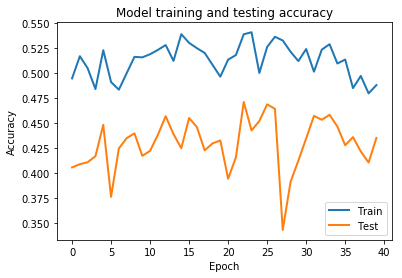

In [72]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model training and testing accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [31]:
scaled_testx_ext=scaler.fit_transform(test_x_extended)

In [32]:
scaled_testx_ext.shape

(256931, 48)

In [33]:
preds = autoencoder.predict(scaled_testx_ext)

In [34]:
preds.shape

(256931, 48)

In [35]:
mse = np.mean(np.power(scaled_testx_ext - preds, 2), axis=1)

In [36]:


error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'Actual': test_y_extended})
error_df.describe()

,Actual,Reconstruction_error
count,256931.00000,256931.000000
mean,0.02705,0.591933
std,0.16223,22.683817
min,0.00000,0.006588
25%,0.00000,0.045546
50%,0.00000,0.073024
75%,0.00000,0.189929
max,1.00000,9025.748849


In [252]:
#add stats for the reconstr. erro

(array([2.56921e+05, 4.00000e+00, 2.00000e+00, 3.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([6.58804005e-03, 9.02580814e+02, 1.80515504e+03, 2.70772927e+03,
        3.61030349e+03, 4.51287772e+03, 5.41545194e+03, 6.31802617e+03,
        7.22060040e+03, 8.12317462e+03, 9.02574885e+03]),
 <a list of 10 Patch objects>)

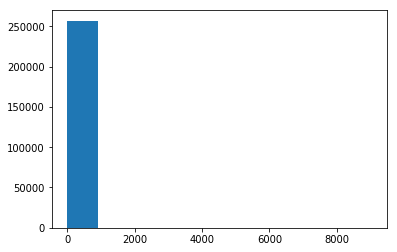

In [253]:
plt.hist(error_df['Reconstruction_error'])

In [82]:
num_attr = error_df.Actual[error_df.Actual == 1].count()
num_normal = error_df.Actual[error_df.Actual == 0].count()
no_skill_level = num_attr/(num_attr + num_normal)

num_attr, num_normal, no_skill_level

(6950, 249981, 0.027050064024971687)

In [101]:
reconErr1=error_df[error_df.Reconstruction_error<1]

(array([148356.,  47181.,  17756.,  10210.,   4558.,   5641.,   2190.,
          4043.,   1599.,    892.]),
 array([0.00670708, 0.10603158, 0.20535607, 0.30468056, 0.40400506,
        0.50332955, 0.60265404, 0.70197854, 0.80130303, 0.90062752,
        0.99995202]),
 <a list of 10 Patch objects>)

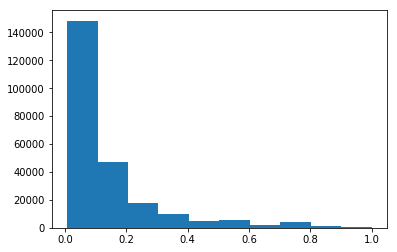

In [102]:
plt.hist(reconErr1['Reconstruction_error'])

In [103]:
precision_rt, recall_rt, threshold_rt = precision_recall_curve(reconErr1.Actual, reconErr1.Reconstruction_error)

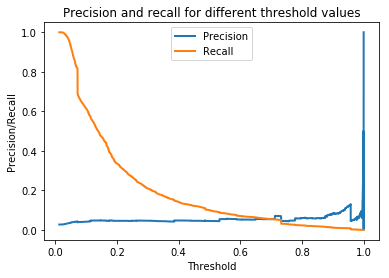

In [104]:
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=2)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=2)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [107]:
threshold_fixed=0.07

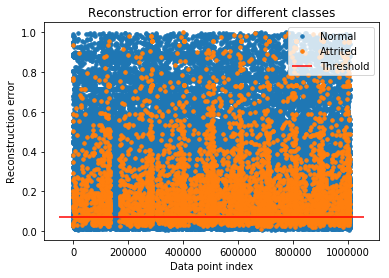

In [108]:

groups = reconErr1.groupby('Actual')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Attrited" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

In [37]:
preds_y_binary = [1 if e > 0.07 else 0 for e in error_df.Reconstruction_error]

print(classification_report(test_y_extended, preds_y_binary))

              precision    recall  f1-score   support

           0       0.99      0.48      0.65    249981
           1       0.04      0.82      0.08      6950

    accuracy                           0.49    256931
   macro avg       0.52      0.65      0.36    256931
weighted avg       0.96      0.49      0.63    256931



In [255]:
conf_matrix = confusion_matrix(error_df.Actual, preds_y_binary)
conf_matrix

array([[120340, 129641],
       [  1218,   5732]], dtype=int64)

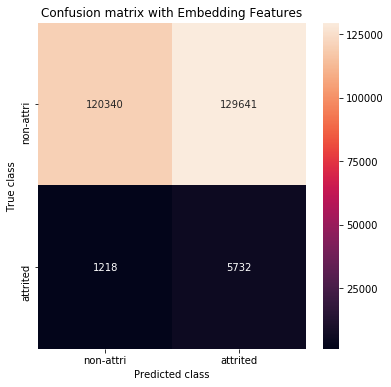

In [256]:
LABELS = ["non-attri","attrited"]
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix with Embedding Features")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [38]:
roc_auc_score(test_y_extended, preds_y_binary)

0.6530723937896978

### model seems to be not complex engough. try LSTM

In [186]:
nb_epoch = 30
batch_size = 256
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim1 = 30
encoding_dim2 = 15
hidden_dim = int(encoding_dim2 / 2) #i.e. 7
learning_rate = 1e-7

In [204]:
def define_models(input_dim, output_dim):
    ## define the encoder architecture 
    ## input : sequence 
    ## output : encoder states 
    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(encoding_dim1, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim2, activation="softmax", activity_regularizer=regularizers.l1(learning_rate))(encoder)
    encoder = Dense(hidden_dim, activation="relu")(encoder)
    decoder = Dense(hidden_dim, activation='tanh')(encoder)
    decoder = Dense(encoding_dim2, activation='tanh')(decoder)
    decoder = Dense(encoding_dim1, activation='softmax')(decoder)
    decoder = Dense(input_dim, activation='relu')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    return autoencoder



In [205]:
autoencoder_lstm = define_models(input_dim, input_dim)

In [206]:
autoencoder_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_35 (InputLayer)        (None, 48)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 30)                1470      
_________________________________________________________________
dense_54 (Dense)             (None, 15)                465       
_________________________________________________________________
dense_55 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_56 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_57 (Dense)             (None, 15)                120       
_________________________________________________________________
dense_58 (Dense)             (None, 30)                480       
__________

In [197]:
scaled_trainx.shape[0]

750019

In [198]:
scaled_trainx1=scaled_trainx.reshape(scaled_trainx.shape[0], 1, input_dim)

In [199]:
scaled_testx1=scaled_testx.reshape(scaled_testx.shape[0], 1, input_dim)

In [200]:
type(scaled_trainx1)

numpy.ndarray

In [201]:
scaled_testx1.shape

(251738, 1, 48)

In [207]:
autoencoder_lstm.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="autoencoder_lstm.h5",
                               save_best_only=True,
                               verbose=0)

history_lstm = autoencoder_lstm.fit(np.array(scaled_trainx), np.array(scaled_trainx),
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(scaled_testx, scaled_testx),
                    verbose=1,
                    callbacks=[cp]).history

Train on 750019 samples, validate on 251738 samples
Epoch 1/30
750019/750019 [==============================] - 20s 26us/sample - loss: 0.8690 - acc: 0.2997 - val_loss: 0.7879 - val_acc: 0.3312
Epoch 2/30
750019/750019 [==============================] - 18s 24us/sample - loss: 0.7820 - acc: 0.3855 - val_loss: 0.7403 - val_acc: 0.3319
Epoch 3/30
750019/750019 [==============================] - 17s 23us/sample - loss: 0.7529 - acc: 0.3969 - val_loss: 0.7179 - val_acc: 0.3501
Epoch 4/30
750019/750019 [==============================] - 19s 25us/sample - loss: 0.7360 - acc: 0.4341 - val_loss: 0.7008 - val_acc: 0.3873
Epoch 5/30
750019/750019 [==============================] - 21s 28us/sample - loss: 0.7228 - acc: 0.4186 - val_loss: 0.6878 - val_acc: 0.3719
Epoch 6/30
750019/750019 [==============================] - 21s 27us/sample - loss: 0.7132 - acc: 0.4176 - val_loss: 0.6795 - val_acc: 0.3540
Epoch 7/30
750019/750019 [==============================] - 24s 32us/sample - loss: 0.7068 - acc

## create profile report


In [103]:
pandasreport=pandprof.ProfileReport(univ)

In [104]:
pandasreport.to_file("Sequence_Embedding_fn_EDA.html")